In [1]:
from google.colab import drive # link my google drive to this colab notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
import seaborn as sns
import numpy as np
from datetime import datetime
import seaborn as sns

In [3]:
dataframe = pd.read_excel('/content/drive/MyDrive/Copy of University_Class_Schedule_Fall_2023_CAS_CharlesRiver.xlsx') # put the spreadsheet into a data frame
dataframe.head(2)

bldData = pd.read_csv('/content/drive/MyDrive/bldData.csv')
new_bld = bldData

### The problem with this dataframe is that the class x, class y, bld x, bld y columns are empty.

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
# @title XY Coordinates for Classroom Buildings
### Inputs the corresponding x coordinates into the Bld X column of the dataframe
coordinates = {'AAS': 42.34847, 'BRB': 42.34868, 'CAS': 42.35083, 'CDS': 42.35060,
               'CGS': 42.35146, 'COM': 42.34906, 'EGL': 42.35074, 'EIB': 42.3507,
               'EOP': 42.35074, 'EPC': 42.35, 'FLR': 42.35015, 'HAR': 42.34975,
               'HIS': 42.35043, 'IEC': 42.35106, 'IRB': 42.35073, 'IRC': 42.35072,
               'JSC': 42.35119, 'KCB': 42.34962, 'LAW': 42.35112, 'LSE': 42.34912,
               'MCS': 42.34919, 'MOR': 42.34915, 'MUG': 42.35172, 'PHO': 42.34942,
               'PLS': 42.35062, 'PRB': 42.34884, 'PSY': 42.34939, 'PTH': 42.35238,
               'REL': 42.35123, 'SAR': 42.34981, 'SCI': 42.3489, 'SHA': 42.35157,
               'SOC': 42.34954, 'STH': 42.35073, 'STO': 42.350221, 'WED': 42.34987,
               'YAW': 42.35047}
dataframe['Bld X'] = dataframe['Bld'].map(coordinates)
dataframe.head(30)

### Inputs the corresponding y coordinates into the Bld Y column of the dataframe
coordinates = {'AAS': -71.10797, 'BRB': -71.10133, 'CAS': -71.10515, 'CDS': -71.10281,
               'CGS': -71.11465, 'COM': -71.10246, 'EGL': -71.10415, 'EIB': -71.09992,
               'EOP': -71.11569, 'EPC': -71.10783, 'FLR': -71.11169, 'HAR': -71.09974,
               'HIS': -71.10367, 'IEC': -71.11525, 'IRB': -71.10058, 'IRC': -71.1005,
               'JSC': -71.10009, 'KCB': -71.0981, 'LAW': -71.1074, 'LSE': -71.1019,
               'MCS': -71.10421, 'MOR': -71.10092, 'MUG': -71.10793, 'PHO': -71.1063,
               'PLS': -71.10398, 'PRB': -71.10118, 'PSY': -71.10395, 'PTH': -71.11867,
               'REL': -71.09991, 'SAR': -71.102, 'SCI': -71.10016, 'SHA': -71.11749,
               'SOC': -71.10491, 'STH': -71.10766, 'STO': -71.103841, 'WED': -71.10085,
               'YAW': -71.09792}
dataframe['Bld Y'] = dataframe['Bld'].map(coordinates)
# dataframe.head(3)

In [5]:
# @title XY Coordinates for Department Buildings
dataframe['class_code'] = dataframe['Class'].str[4:6]

### Inputs the corresponding x coordinates into the Class X column of the dataframe
coordinatesX = {'AA': 42.3484255, 'AM': 42.3505343, 'AN': 42.3505343, 'AR': 42.35021908,
               'AS': 42.3499108, 'BB': 42.3484431, 'BI': 42.3484431, 'CC':42.3499108,
               'CH': 42.3489462, 'LC': 42.3505433, 'LD': 42.3503263, 'CI': 42.3496522,
               'CL': 42.3505433, 'XL': 42.3505433,'CS': 42.34946, 'EE': 42.3503165,
               'EC': 42.3505627, 'EN': 42.3505134, 'FY':42.3499108,'JS': 42.35119, 'LD': 42.3503263,
               'LF': 42.3496522, 'LN': 42.3505433, 'LG': 42.3505433, 'LH': 42.3505433, 'HI': 42.3505343,
               'AH': 42.3499108, 'IR': 42.3503263, 'LT': 42.3505433, 'LI': 42.3496522, 'LJ': 42.3505433,
               'LK': 42.3505433, 'LX': 42.3496627, 'LW': 42.3484255, 'MR': 42.3484431, 'MA': 42.34946,
               'LY': 42.3505433, 'NE': 42.3489762, 'PH': 42.3505433, 'PY': 42.3489462, 'PO': 42.3505343,
               'PS': 42.348337, 'RN': 42.3506107, 'LR': 42.3505433, 'SO': 42.3489018, 'NS': 42.3499108,
               'LS': 42.3496522, 'WR': 42.35047}
dataframe['Class X'] = dataframe['class_code'].map(coordinatesX)

### Inputs the corresponding y coordinates into the Class Y column of the dataframe
coordinatesY = {'AA': -71.1078164, 'AM': -71.1037761, 'AN': -71.1037761, 'AR': -71.1039511,
               'AS': -71.1065953, 'BB': -71.1008615, 'BI': -71.1008615, 'CC':-71.1065953,
               'CH': -71.0969547, 'LC': -71.1068238, 'LD': -71.1003651, 'CI': -71.1058719,
               'CL': -71.1068238, 'XL': -71.1068238, 'CS': -71.1028645, 'EE': -71.105047,
               'EC': -71.1053996, 'EN': -71.1039323, 'FY':-71.1065953, 'JS':-71.10009, 'LN':-71.1068238,
               'LT': -71.1068238, 'LF': -71.1058719, 'LG': -71.1068238, 'LH':-71.1068238, 'HI': -71.1037761,
               'LW': -71.1078164, 'AH': -71.1065953, 'IR': -71.1003651, 'LI': -71.1058719, 'LJ': -71.1068238,
               'LK': -71.1068238, 'LX': -71.1014116, 'MR': -71.1008615, 'MA': -71.1028645,
               'LY': -71.1068238, 'NE': -71.1019275, 'PH': -71.1068238, 'PY': -71.0969547, 'PO': -71.1037761,
               'PS': -71.100772, 'RN': -71.0999844, 'LR': -71.1068238, 'SO': -71.104525, 'NS': -71.1065953,
               'LS': -71.1058719, 'WR': -71.09792}
dataframe['Class Y'] = dataframe['class_code'].map(coordinatesY)

# dataframe.head(3)

In [6]:
# @title Addresses for Classroom and Department Buildings
department_address = {"AA": "138 Mountfort St, Brookline, MA 02446", "AM": "226 Bay State Road",
                      "AN": "232 Bay State Road", "AR": "675 Commonwealth Avenue",
                      "BB": "5 Cummington Mall", "BI": "5 Cummington Mall",
                      "CH": "590 Commonwealth Ave", "LC": "745 Commonwealth Avenue",
                      "CI": "718 Commonwealth Avenue", "CL": "745 Commonwealth Ave",
                      "XL": "745 Commonwealth Ave", "CS": "665 Commonwealth Avenue",
                      "EE":"685 Commonwealth Avenue", "EC":"270 Bay State Road",
                      "EN":"236 Bay State Road", "EN":"236 Bay State Road",
                      "EN":"236 Bay State Road", "EN":"236 Bay State Road",
                      "EN":"236 Bay State Road", "LF":"718 Commonwealth Avenue",
                      "LF":"718 Commonwealth Avenue", "LG":"745 Commonwealth Avenue",
                      "LG":"745 Commonwealth Avenue", "HI":"226 Bay State Road",
                      "AH":"725 Commonwealth Avenue", "IR":"121 Bay State Road",
                      "LI":"718 Commonwealth Avenue", "LJ":"745 Commonwealth Avenue",
                      "LK":"745 Commonwealth Avenue", "LX":"621 Commonwealth Avenue",
                      "MR":"5 Cummington Mall", "MA":"665 Commonwealth Ave",
                      "NE":"610 Commonwealth Avenue", "PH":"745 Commonwealth Avenue",
                      "PY":"590 Commonwealth Avenue", "PO":"232 Bay State Road",
                      "PS":"64 Cummington Mall", "PS":"64 Cummington Mall",
                      "RN":"145 Bay State Road", "LR":"745 Commonwealth Avenue",
                      "LR":"745 Commonwealth Avenue","SO":"100 Cummington Mall",
                      "LS":"718 Commonwealth Avenue","AS":"725 Commonwealth Avenue",
                      "CC":"725 Commonwealth Avenue","FY*":"725 Commonwealth Avenue",
                      "LD":"121 Bay State Road", "LH":"745 Commonwealth Avenue",
                      "LN":"745 Commonwealth Avenue", "LT":"745 Commonwealth Avenue",
                      "LW":"138 Mountfort St, Brookline, MA 0244","LY":"745 Commonwealth Avenue",
                      "NS":"725 Commonwealth Ave, Boston MA", "WR":"100 Bay State Road",
                      }
dataframe['dpt_address'] = dataframe['class_code'].map(department_address)

bld_address = {"AAS": "138 Mountfort Street", "BRB":"5 Cummington Mall",
               "CAS": "685-725 Commonwealth Avenue", "CDS": "645-655 Commonwealth Avenue",
               "CGS": "871 Commonwealth Avenue", "COM":"640 Commonwealth Avenue",
               "EGL": "236 Bay State Road", "EIB": "143 Bay State Road",
               "EOP": "890 Commonwealth Avenue", "EPC": "750 Commonwealth Avenue",
               "FLR": "808 Commonwealth Avenue", "HAR": "595 Commonwealth Avenue",
               "HIS": "226 Bay State Road", "IEC": "888 Commonwealth Avenue",
               "IRB": "154 Bay State Road", "IRC": "152 Bay State Road",
               "JSC": "147 Bay State Road", "KCB": "565 Commonweatlh Avenue",
               "LAW": "765 Commonwealth Avenue", "LSE":"24 Cummington Mall",
               "MCS": "111 Cummington Mall", "MOR": "602 Commonwealth Avenue",
               "MUG": "771 Commonwealth Avenue", "PHO": "6-8 St. Mary's Street",
               "PLS": "232 Bay State Road", "PRB": "3 Cummington Street",
               "PSY": "64-72-86 Cummington Mall", "PTH": "949 Commonwealth Avenue",
               "REL": "145 Bay State Road", "SAR": "635 Commonwealth Avenue",
               "SCI": "590-596 Commonwealth Avenue", "SHA": "928 Commonwealth Avenue",
               "SOC": "96-100 Cummington Mall", "STH": "745 Commonwealth Avenue",
               "STO": "675 Commonwealth Avenue", "WED": "2 Silber Way",
               "YAW": "100 Bay State Road"
              }
dataframe['bld_address'] = dataframe['Bld'].map(bld_address)

# Creates the classroom column in the 'dataframe' dataframe
dataframe['classroom'] = dataframe['Bld'] + dataframe['Room'].astype(str)

# dataframe.head()



In [7]:
#@title Adds _department to any professors that have the same last name as other professors

# First, identify instructors with the same last name but different departments
duplicate_names = dataframe[dataframe.duplicated('Instructor', keep=False)]
unique_names = duplicate_names.drop_duplicates(['Instructor', 'class_code'])

# Create a function to update the name if it's a duplicate with a different department
def update_name(row):
    if row['Instructor'] in unique_names['Instructor'].values:
        depts = unique_names[unique_names['Instructor'] == row['Instructor']]['class_code'].values
        if len(depts) > 1:  # If there is more than one department for the same last name
            return f"{row['Instructor']}_{row['class_code']}"
    return row['Instructor']

# Apply the function to the 'Instructor' column
dataframe['Instructor'] = dataframe.apply(update_name, axis=1)

dataframe.head()

,Class,Class X,Class Y,Title,Instructor,Cr Hrs,Type,Enroll,Limit,Bld,...,Eligible Grade Dt,Last Drop w/o W Dt,Last Drop with W Dt,XRG,Non XRG,Bld.1,class_code,dpt_address,bld_address,classroom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaT,NaN,NaN,CAS,NaN,NaN,NaN,NaN
1,CAS AA234 A1,42.348425,-71.107816,Afam Glnl Persp,Scott,4,Independent,20,20,AAS,...,NaT,NaT,NaT,0,20,BRB,AA,"138 Mountfort St, Brookline, MA 02446",138 Mountfort Street,AAS102
2,CAS AA114 B1,42.348425,-71.107816,Kongo to Cuba,Reyes_AA,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaT,0,6,CDS,AA,"138 Mountfort St, Brookline, MA 02446",NaN,NaN
3,CAS AA114 D1,42.348425,-71.107816,Kongo to Cuba,Reyes_AA,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaT,0,6,CGS,AA,"138 Mountfort St, Brookline, MA 02446",NaN,NaN
4,CAS AA114 E1,42.348425,-71.107816,Kongo to Cuba,Reyes_AA,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaT,0,7,COM,AA,"138 Mountfort St, Brookline, MA 02446",NaN,NaN


**In this next part, cells will either show code for the UNDERESTIMATE, or OVERESTIMATE of kilometers professors walk per day. The overestimate assumes that professors go back to their department building in between every class, while the underestimate assumes that professors just go from class to class.**

In [8]:
# @title OVERESTIMATE of km professors walk a day
# creates a dataframe of only independent lectures (this project is not concerned with discussion sections)

df_lec_ind = dataframe[(dataframe['Type'] == "Lecture") | (dataframe['Type'] == "Independent")]

# Function to calculate the distance IN KILOMETERS
def calculate_distance_from_dpt(row):
    x1, y1 = row['Class X'], row['Class Y']
    x2, y2 = row['Bld X'], row['Bld Y']
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    distance = distance*100
    if row['Day'].count(',') == 0: ### each comma means another day is being taught, meaning their distance is inaccurate
        distance = distance
    elif row['Day'].count(',') == 1:
        distance *= 2
    elif row['Day'].count(',') == 2:
        distance *= 3
    elif row['Day'].count(',') == 3:
        distance *= 2
    elif row['Day'].count(',') == 4:
        distance *= 5
    return distance

# Add a new column 'distance' to the DataFrame
df_lec_ind['distance'] = df_lec_ind.apply(calculate_distance_from_dpt, axis=1)

# drop empty and na
df_lec_ind = df_lec_ind.dropna(subset=['distance'])

# Display the DataFrame with the distance column
test = df_lec_ind[df_lec_ind['class_code'] == "EC"]
#test.head(2)

<ipython-input-8-7d6ec7feb87e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lec_ind['distance'] = df_lec_ind.apply(calculate_distance_from_dpt, axis=1)


In [9]:
# @title UNDERESTIMATE of km professors walk a day
### Understimate. Takes into account that professors probably dont go back to their department in between every clas.

new = df_lec_ind
grouped = new.groupby('Instructor')
# Sort each group by the datetime_column
sorted_groups = grouped.apply(lambda x: x.sort_values(by='Start'))

def calculate_distance(x1, y1, x2, y2):
    return (np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))*100

def calculate_total_distance(schedule): ### Takes a schedule and calcualtes a 'new_distances' column
    total_distance = 0
    prev_x, prev_y = schedule['Bld X'].iloc[0], schedule['Bld Y'].iloc[0]
    prev_day = schedule['Day'].iloc[0]
    last_x = schedule['Class X'].iloc[-1]
    last_y = schedule['Class Y'].iloc[-1]

    for idx, row in schedule.iterrows():
        class_x, class_y = row['Class X'], row['Class Y']
        total_distance += calculate_distance(prev_x, prev_y, class_x, class_y)
        prev_x, prev_y = class_x, class_y

    total_distance += calculate_distance(schedule['Bld X'].iloc[0], schedule['Bld Y'].iloc[0], last_x, last_y)
    return total_distance

total_distances = {}
for professor, schedule in grouped:
    total_distance = calculate_total_distance(schedule)
    total_distances[professor] = total_distance

new['new_distances'] = new['Instructor'].map(total_distances)

new.head(2)

test = new[new['Instructor'] == 'Idson']
test.groupby('Instructor')['new_distances'].sum()
#test.head()

Instructor
Idson    5.576291
Name: new_distances, dtype: float64

In [10]:
# @title NEW UNDERESTIMATE of km professors walk a week

# group by professor, group by day, sort by start time
# for each group of days, start at the department, then calcualte distance to first class in that group, and thens second...
# go to next group of days
# sum everything
# keep in mind for day 0, you must multiply by 3, for day 1, you must multiply by 2 etc.

"""
idson | class a | 0 | 2km
idson | class b | 0 |
idson | class c | 1 | 3km

new dataframe
idson  5km

"""
new1 = new.copy()
sorted_schedule = new.copy()

def calculate_distance(x1, y1, x2, y2):
    return (np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))*100

def distance_per_prof(df):
    # Sort the dataframe by day and start time for each instructor
    df = df.sort_values(by=['Day', 'Start'])
    # Initialize the dictionary to hold total distances
    total_distances = {instructor: 0 for instructor in df['Instructor'].unique()}
    # Iterate over the dataframe
    for instructor, group in df.groupby('Instructor'):
        for day, subgroup in group.groupby('Day'): # iterate through each day group (mon/wed/fri, tue/thu, etc)
            prev_x, prev_y = None, None
            for index, row in subgroup.iterrows(): # iterate through each row in the day subgroup
                if prev_x == None and prev_y == None: # adds distance from dpt to first class
                    x1, y1 = row['Class X'], row['Class Y']
                    x2, y2 = row['Bld X'], row['Bld Y']
                    total_distances[instructor] += calculate_distance(x1,y1,x2,y2) # plus equals the distance from first class to next
                    prev_x, prev_y = row['Class X'], row['Class Y'] # update previous class
                else: # if it is not the first class, then calculate distance from class to class
                    x1, y1 = row['Class X'], row['Class Y']
                    total_distances[instructor] += calculate_distance(x1,y1,prev_x,prev_y) # plus equals the distance from first class to next
                    prev_x, prev_y = row['Class X'], row['Class Y'] # update previous clas
                x1, y1 = row['Class X'], row['Class Y']
                x2, y2 = row['Bld X'], row['Bld Y']
                total_distances[instructor] += calculate_distance(x1,y1,x2,y2) # adds distance from last class back to dpt
        if day.count(',') == 0: # You must multiply distance by how many days they teach
            total_distances[instructor] = total_distances[instructor]
        elif day.count(',') == 1:
            total_distances[instructor] = total_distances[instructor]*2
        elif day.count(',') == 2:
            total_distances[instructor] = total_distances[instructor]*3
        elif day.count(',') == 3:
            total_distances[instructor] = total_distances[instructor]*4
        else:
            total_distances[instructor] = total_distances[instructor]*5
    total_distances = pd.DataFrame(list(total_distances.items()), columns=['Instructor', 'avg_dist_km'])
    return total_distances

result = distance_per_prof(new1)

result.head(10)

algo=result
# this version gets the perday calculation correct


In [11]:
# @title OVERESTIMATE basic statistics
## Basic statistics of distance PER WEEK OVERESTIMATE

mean_distance = df_lec_ind.groupby('Instructor')['distance'].sum().mean() # mean
median_distance = df_lec_ind.groupby('Instructor')['distance'].sum().median() #median
sd_distance = df_lec_ind.groupby('Instructor')['distance'].sum().std() # standard deviation

test_prof = df_lec_ind[df_lec_ind['Instructor'] == "Idson"] # test any professor here

print("Mean distance:", mean_distance, "Median Distance:", median_distance,
      "Standard Deviation:", sd_distance)

# total distance
print(df_lec_ind['distance'].sum())

# print(test_prof['distance'].mean())
# print(test_prof['distance'].sum())


#### things to note about these statistics.
# mean is higher than median, right skewed. Standard deviation is very high, implies a high variability.
# the goal should be to lower all of these statistics.

Mean distance: 1.4224527464706802 Median Distance: 0.7180893874740736 Standard Deviation: 2.0909096087058483
1244.6461531618452


In [12]:
# @title UNDERESTIMATE basic statistics
## Basic statistics of distance PER WEEK UNDERESTIMATE (assuming profs go class to class and NOT back to dpt)

#mean_distance = new.groupby('Instructor')['new_distances'].sum().mean() # mean
#median_distance = new.groupby('Instructor')['new_distances'].sum().median() #median
#sd_distance = new.groupby('Instructor')['new_distances'].sum().std() # standard deviation

#test_prof = new[new['Instructor'] == "Idson"] # test any professor here

#print("Mean distance:", mean_distance, "Median Distance:", median_distance,
#      "Standard Deviation:", sd_distance)

# total distance
#print(new['new_distances'].sum())

# print(test_prof['distance'].mean())
# print(test_prof['distance'].sum())

print("Mean:", algo['avg_dist_km'].mean())
print("Median:", algo['avg_dist_km'].median())
print("Standard Deviation:", algo['avg_dist_km'].std())
print("Total:", algo['avg_dist_km'].sum())

mean_distance=algo['avg_dist_km'].mean()
median_distance=algo['avg_dist_km'].median()
sd_distance=algo['avg_dist_km'].std()


#### things to note about these statistics.
# mean is higher than median, right skewed. Standard deviation is very high, implies a high variability.
# the goal should be to lower all of these statistics.

Mean: 2.279944428104163
Median: 1.2822531750028388
Standard Deviation: 2.8370369675136624
Total: 1994.9513745911427


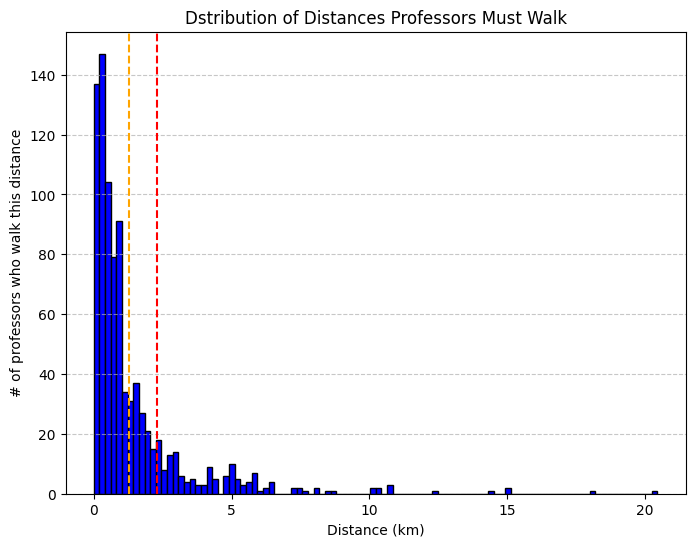

In [13]:
# @title OVERESTIMATE histogram
### Creates a histogram where each "bucket" represents a distance. OVER ESTIMATE

plt.figure(figsize=(8,6))
plt.hist(df_lec_ind.groupby('Instructor')['distance'].sum(), bins=100, color = 'blue', edgecolor = 'black')
plt.title('Dstribution of Distances Professors Must Walk')
plt.axvline(mean_distance, color='red', linestyle='--', label=f'Mean Distance ({mean_distance:.2f} km)')
plt.axvline(median_distance, color='orange', linestyle='--', label=f'Mean Distance ({mean_distance:.2f} km)')
plt.xlabel('Distance (km)')
plt.ylabel('# of professors who walk this distance')
plt.grid(axis='y', linestyle='--', alpha = 0.7)
plt.show()

### the data is clearly right skewed

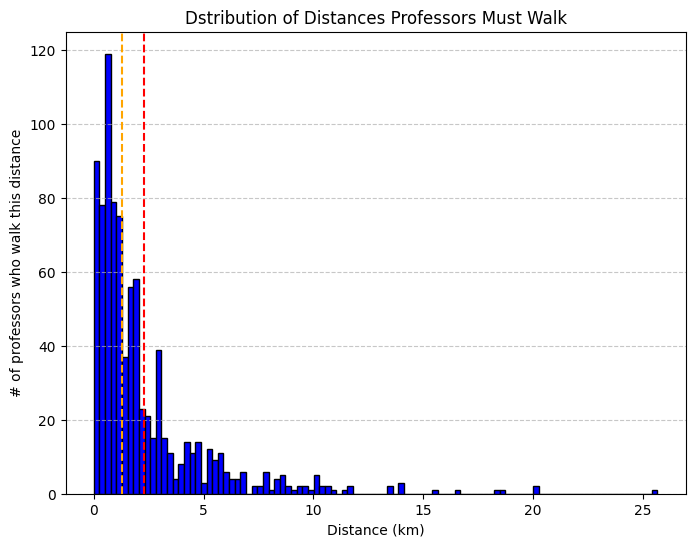

In [14]:
# @title UNDERESTIMATE histogram
### Creates a histogram where each "bucket" represents a distance. OVER ESTIMATE

plt.figure(figsize=(8,6))
plt.hist(algo['avg_dist_km'], bins=100, color = 'blue', edgecolor = 'black')
plt.title('Dstribution of Distances Professors Must Walk')
plt.axvline(mean_distance, color='red', linestyle='--', label=f'Mean Distance ({mean_distance:.2f} km)')
plt.axvline(median_distance, color='orange', linestyle='--', label=f'Mean Distance ({mean_distance:.2f} km)')
plt.xlabel('Distance (km)')
plt.ylabel('# of professors who walk this distance')
plt.grid(axis='y', linestyle='--', alpha = 0.7)
plt.show()

### the data is clearly right skewed

<ipython-input-15-7dba2de653ec>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_lec_ind.groupby('Instructor')['distance'].sum(), color='blue', shade=True)


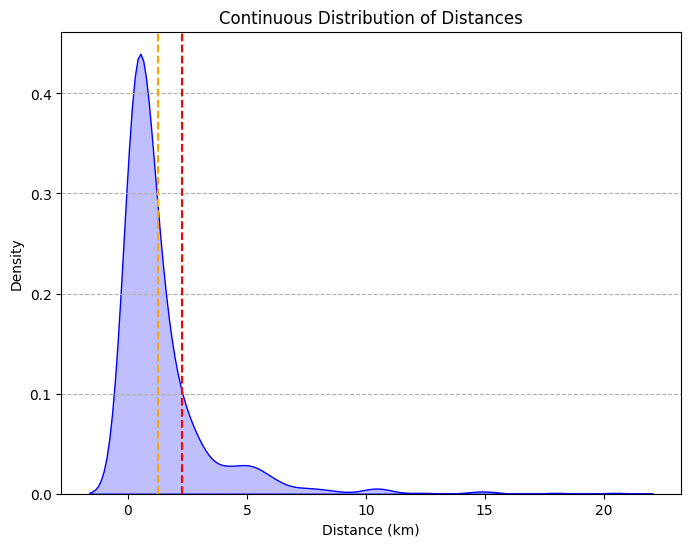

In [15]:
# @title OVERESTIMATE kde plot

### Creates a kde plot

plt.figure(figsize=(8, 6))
sns.kdeplot(df_lec_ind.groupby('Instructor')['distance'].sum(), color='blue', shade=True)
plt.title('Continuous Distribution of Distances')
plt.axvline(mean_distance, color='red', linestyle='--', label=f'Mean Distance ({mean_distance:.2f} km)')
plt.axvline(median_distance, color='orange', linestyle='--', label=f'Mean Distance ({mean_distance:.2f} km)')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--')
plt.show()

<ipython-input-16-e0a5f83c5b8b>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(algo['avg_dist_km'], color='blue', shade=True)


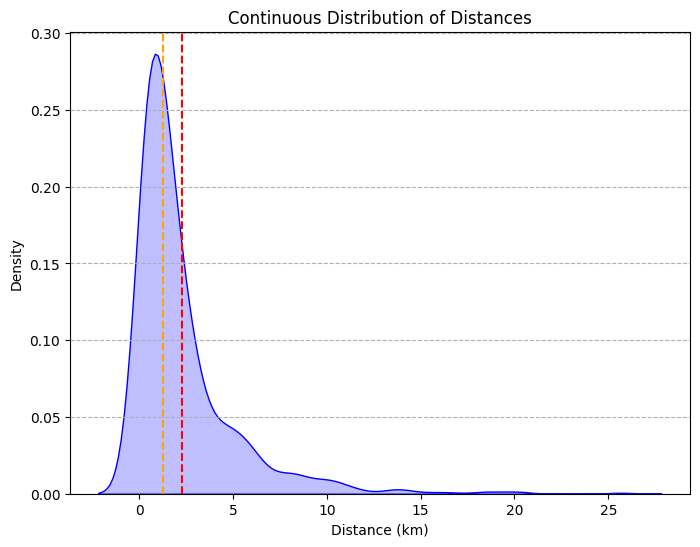

In [16]:
# @title UNDERESTIMATE  kde plot

### Creates a kde plot

plt.figure(figsize=(8, 6))
sns.kdeplot(algo['avg_dist_km'], color='blue', shade=True)
plt.title('Continuous Distribution of Distances')
plt.axvline(mean_distance, color='red', linestyle='--', label=f'Mean Distance ({mean_distance:.2f} km)')
plt.axvline(median_distance, color='orange', linestyle='--', label=f'Mean Distance ({mean_distance:.2f} km)')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--')
plt.show()

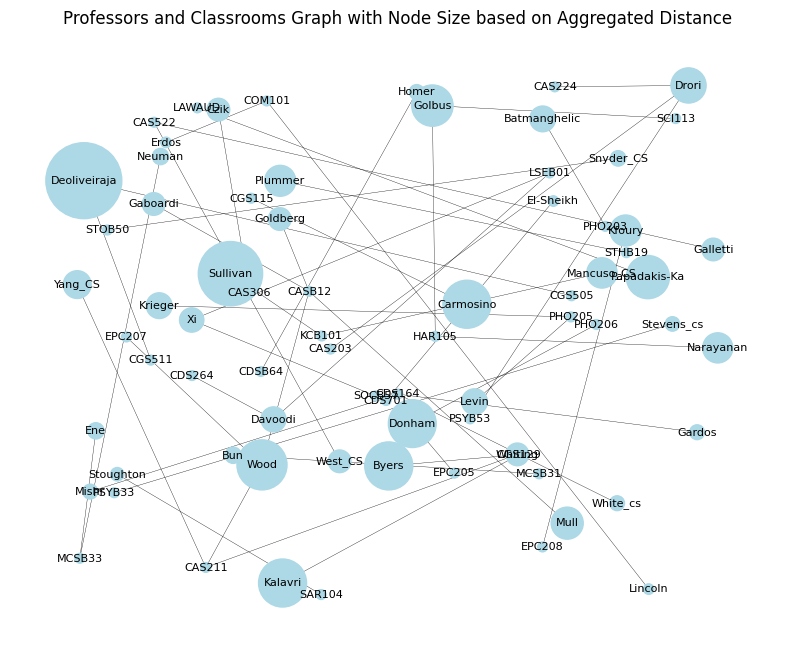

In [17]:
# @title OVERESTIMATE Graph Nodes
### Creates a graph where nodes get larger as the professor distance gets larger

# Filter data
graph = df_lec_ind[df_lec_ind['class_code'] == 'CS'] ### Change the department code to view any department

G = nx.Graph()
professor_distances = graph.groupby('Instructor')['distance'].sum().reset_index()

# Add professors and classrooms as nodes
for row in graph.itertuples():
    professor = row.Instructor
    classroom = row.classroom

    G.add_node(professor, type='professor')
    G.add_node(classroom, type='classroom')

    G.add_edge(professor, classroom)

# Create a dictionary of node sizes based on aggregated distances
scaling_factor = 500  # Adjust the scaling factor
distance_dict = {professor: distance * scaling_factor for professor, distance in zip(professor_distances['Instructor'], professor_distances['distance'])}

# Draw the graph
pos = nx.random_layout(G) # different layouts for how nodes are laid out
plt.figure(figsize=(10, 8))

# Check if the node has an aggregated distance in the dictionary before setting the size
node_sizes = [distance_dict.get(n, 50) for n in G.nodes]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=0.25)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.axis('off')
plt.title('Professors and Classrooms Graph with Node Size based on Aggregated Distance')
plt.show()

In [18]:
# @title Testing for Graph

# Testing accuracy of the size of the professor Nodes

test1 = graph[graph['Instructor'] == 'Deoliveiraja'] # Full-time lecturer
test2 = graph[graph['Instructor'] == 'Sullivan']  # part time lecturer
test3 = df_lec_ind[df_lec_ind['Instructor'] == 'Mishr']

test1_res = test1['distance'].sum()
test2_res = test2['distance'].sum()
test3_res = test3['distance'].sum()

print(test1_res)
print(test2_res)
print(test3_res)

5.976997788397972
4.290467200952317
0.22826039954383198


In [19]:
# @title See has the worst distance

highest_km = algo
highest_km = highest_km.sort_values(by='avg_dist_km', ascending=False)
highest_km.head(25)


,Instructor,avg_dist_km
179,Ward,25.661596
181,Fassihi Lang,20.111119
326,Milanese,20.111119
157,Lee_LK,18.656047
666,Pasto,18.435456
183,Tall,16.528461
189,Walsh_WR,15.606036
584,Cordner,14.091893
585,White_wr,14.090658
663,Kinraide,13.872032


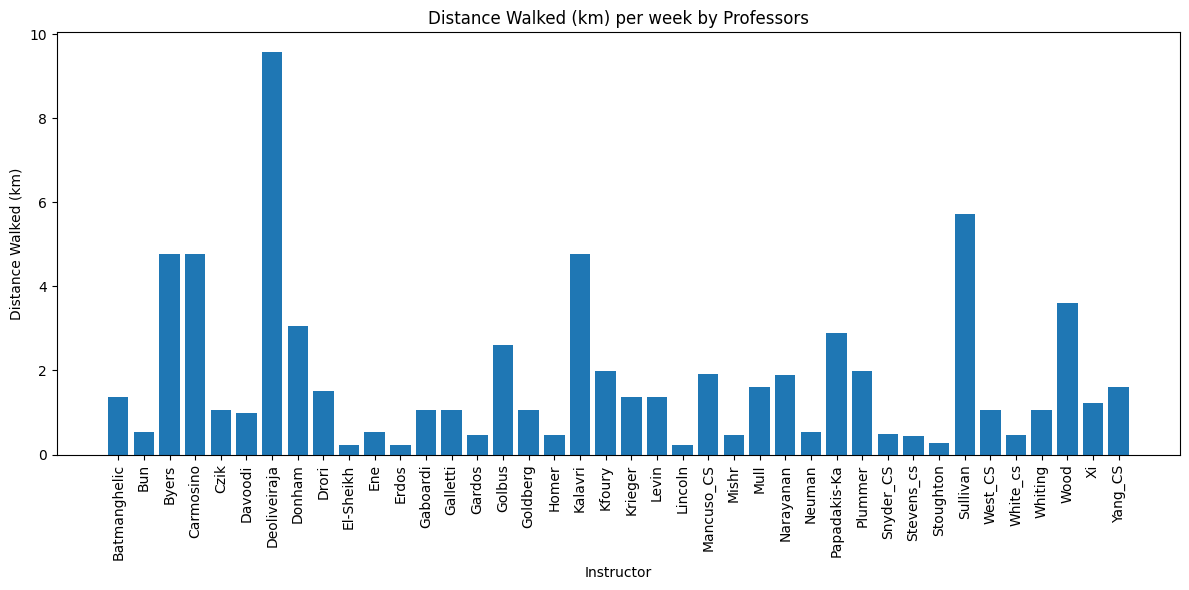

In [20]:
# @title See who in each department has the worst distance
### Tiago for CS!

combine = pd.merge(algo, new, on='Instructor', how='left')

hist = combine[combine['class_code'] == 'CS'] ### Change the department code to view any department

hist = hist[hist['Instructor'] != 'Staff']

hist = hist.sort_values('Instructor')

plt.figure(figsize=(12, 6))
plt.bar(hist['Instructor'], hist['avg_dist_km'])
plt.xlabel('Instructor')
plt.ylabel('Distance Walked (km)')
plt.title('Distance Walked (km) per week by Professors')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility

# Show the plot
plt.tight_layout()

In [21]:
#@title Local Search Greedy Algorithm

def swap(df, index, index1):
    # Helper function that swaps rooms on the schedule. Title, instructor, and class_code
    title, instructor, class_code, bldx, bldy = df.at[index, 'Title'], df.at[index, 'Instructor'], df.at[index, 'class_code'], df.at[index, 'Bld X'], df.at[index, 'Bld Y']
    df.at[index, 'Title'], df.at[index, 'Instructor'], df.at[index, 'class_code'], df.at[index, 'Bld X'], df.at[index, 'Bld Y'] = df.at[index1, 'Title'], df.at[index1, 'Instructor'], df.at[index1, 'class_code'], df.at[index1, 'Bld X'], df.at[index1, 'Bld Y']
    df.at[index1, 'Title'], df.at[index1, 'Instructor'], df.at[index1, 'class_code'], df.at[index1, 'Bld X'], df.at[index1, 'Bld Y'] = title, instructor, class_code, bldx, bldy

def get_prof_subset(schedule, instructor):
    # This function extracts the subset of the schedule for the given instructor
    return schedule[schedule['Instructor'] == instructor]

def greedy_swap(schedule, current_distance, grouped):
    new_total_dist = current_distance
    grouped = grouped.reset_index(drop=True)
    max_index = len(grouped) - 1
    swapped_professors = set()  # Set to keep track of swapped professors
    dist_after_swap = [current_distance]

    for index, row in grouped.iterrows():
        if index == max_index or row['Instructor'] in swapped_professors:
            continue  # Skip if this professor has been swapped or no further pairs

        for index1 in range(index + 1, len(grouped)):
            row1 = grouped.iloc[index1]

            # Skip if either professor has already been swapped
            if (row['Instructor'] in swapped_professors or row1['Instructor'] in swapped_professors or
                    row['Instructor'] == row1['Instructor'] or index1 == max_index):
                continue

            if (row['Start'] == row1['Start'] and row['Stop'] == row1['Stop'] and
                row['Enroll'] < row1['Limit'] and row1['Enroll'] < row['Limit']):

                # Calculate the total distance for both professors before the swap
                original_dist_prof1 = distance_per_prof(get_prof_subset(grouped, row['Instructor']))['avg_dist_km'].sum()
                original_dist_prof2 = distance_per_prof(get_prof_subset(grouped, row1['Instructor']))['avg_dist_km'].sum()

                # Perform the swap
                swap(grouped, index, index1)

                # Calculate the total distance for both professors after the swap
                new_dist_prof1 = distance_per_prof(get_prof_subset(grouped, row['Instructor']))['avg_dist_km'].sum()
                new_dist_prof2 = distance_per_prof(get_prof_subset(grouped, row1['Instructor']))['avg_dist_km'].sum()

                # Check if the new combined distance is better
                if (new_dist_prof1 + new_dist_prof2) < (original_dist_prof1 + original_dist_prof2):
                    # Update the total distance and add professors to the swapped set
                    new_total_dist = new_total_dist - original_dist_prof1 - original_dist_prof2 + new_dist_prof1 + new_dist_prof2
                    swapped_professors.update([row['Instructor'], row1['Instructor']])
                    #print(f"Swap improved distance for professors at rows {index} and {index1}.")
                    dist_after_swap.append(new_total_dist) # for visualization
                    break  # Break out of the inner loop to move to the next professor
                else:
                    # Revert the swap if it's not better
                    swap(grouped, index, index1)

    return grouped, new_total_dist, dist_after_swap

# Usage
schedule = new1.copy()  # Make sure 'new1' is your DataFrame variable
schedule.reset_index(drop=True, inplace=True)
grouped = schedule.sort_values(by=['Instructor', 'Day', 'Start'])
#grouped = grouped.iloc[:300]  # Adjust as necessary
current_prof = distance_per_prof(grouped)  # Replace with your actual function to calculate distance
current_distance = current_prof['avg_dist_km'].sum()  # Replace with your actual calculation to sum distances

print(f"Current total distance: {current_distance}")
new_schedule, new_distance, dist_after_swap = greedy_swap(schedule, current_distance, grouped)
print(f"New total distance after swaps: {new_distance}")


Current total distance: 1994.9513745911431
New total distance after swaps: 1829.9164714473366


In [22]:
#@title Testing for swap function

schedule1 = new1.copy()
schedule1.reset_index(drop=True, inplace=True)
#print(schedule1)
index = 0
index1 = 1
swap(schedule1,index,index1)
#schedule1.head()


In [23]:
#@title Testing Accuracy of Local Search Algo

new_sched = distance_per_prof(new_schedule)
new_sched_total_dist = new_sched['avg_dist_km'].sum()
print(new_sched_total_dist)

1829.9164714473366


In [24]:
#@title Downloading New Schedule CSVs

# Speicific Instructor
a = df_lec_ind
a = a[a['Instructor'] == '']
a.to_csv('Ward.csv', index=True)

# Whole schedule
c = schedule
c.to_csv('schedule.csv', index=True)

# Grouped Schedule
grouped.to_csv('grouped.csv', index=True)

# New Schedule
test = new_schedule[new_schedule['Instructor']=='Switala']
test.head()
test = new_sched[new_sched['Instructor']=='Switala']
test.head()

new_sched = distance_per_prof(new_schedule)
new_sched1 = new_sched['avg_dist_km'].sum()
new_sched.to_csv('FINAL.csv', index=True)
#print(new_sched1)

#idson = new_schedule[new_schedule['Instructor'] == 'Idson']
#idson.to_csv('IDSON_FINAL.csv', index = True)
#print(idson)

In [25]:
#@title New Schedule Statistics

print("Mean:", new_sched['avg_dist_km'].mean())
print("Median:", new_sched['avg_dist_km'].median())
print("Standard Deviation:", new_sched['avg_dist_km'].std())

new_sched_mean = new_sched['avg_dist_km'].mean()
new_sched_median = new_sched['avg_dist_km'].median()

Mean: 2.0913331102255275
Median: 1.1638219116339412
Standard Deviation: 2.7051741903630218


In [26]:
#@title New Schedule Testing

new_schedule.head()
test = new_schedule[new_schedule['Instructor'] == 'Deoliveiraja']
#test.head()

<ipython-input-27-d3346e53bac7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_sched['avg_dist_km'], color='blue', shade=True)


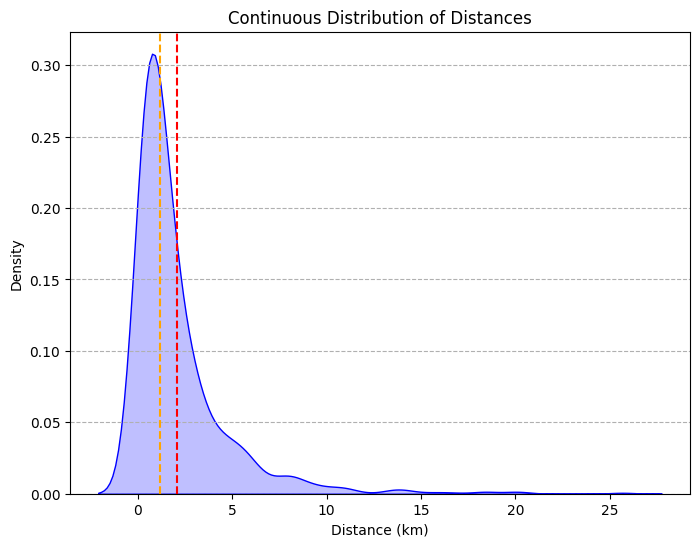

In [27]:
# @title NEW SCHEDULE kde plot

### Creates a kde plot

plt.figure(figsize=(8, 6))
sns.kdeplot(new_sched['avg_dist_km'], color='blue', shade=True)
plt.title('Continuous Distribution of Distances')
plt.axvline(new_sched_mean, color='red', linestyle='--', label=f'Mean Distance ({new_sched_mean:.2f} km)')
plt.axvline(new_sched_median, color='orange', linestyle='--', label=f'Mean Distance ({new_sched_median:.2f} km)')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--')
plt.show()

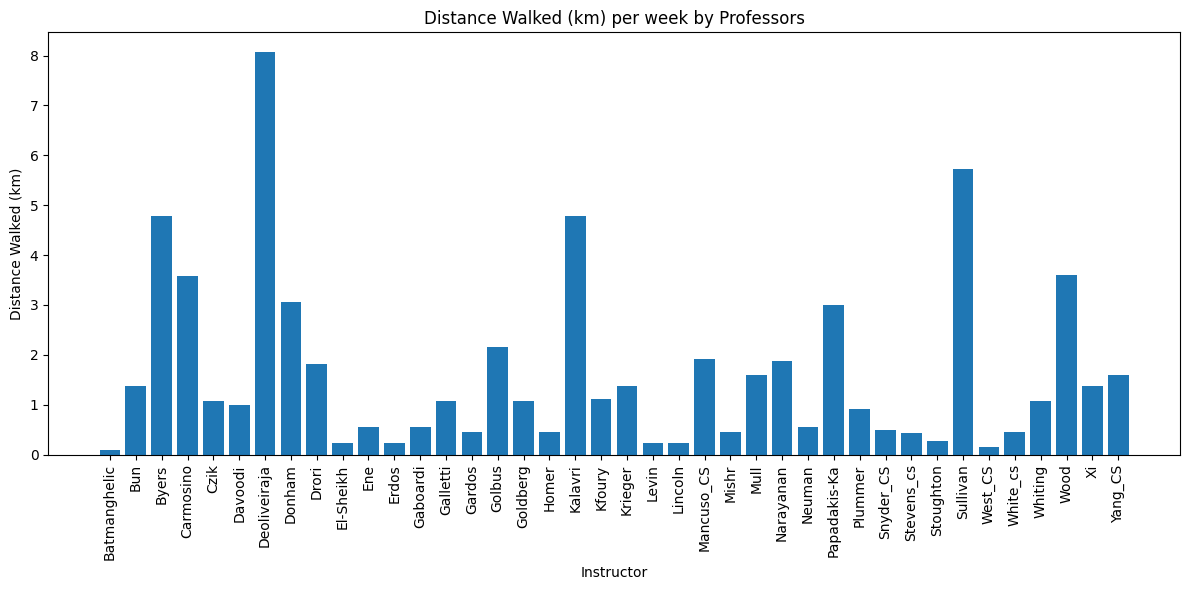

In [28]:
# @title See who in each department has the worst distance in the new schedule

combine = pd.merge(new_sched, new_schedule, on='Instructor', how='left')

hist = combine[combine['class_code'] == 'CS'] ### Change the department code to view any department

hist = hist[hist['Instructor'] != 'Staff']

hist = hist.sort_values('Instructor')

plt.figure(figsize=(12, 6))
plt.bar(hist['Instructor'], hist['avg_dist_km'])
plt.xlabel('Instructor')
plt.ylabel('Distance Walked (km)')
plt.title('Distance Walked (km) per week by Professors')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility

# Show the plot
plt.tight_layout()


In [29]:
# @title See has the worst distance for new schedule

highest_km_new = new_sched
highest_km_new = highest_km_new.sort_values(by='avg_dist_km', ascending=False)
highest_km_new.head(25)


,Instructor,avg_dist_km
189,Ward,25.661596
324,Milanese,20.111119
142,Fassihi Lang,20.111119
655,Pasto,18.435456
140,Lee_LK,18.331766
181,Tall,16.528461
188,Walsh_WR,15.606036
533,Cordner,14.169606
594,White_wr,14.090658
633,Kinraide,13.872032


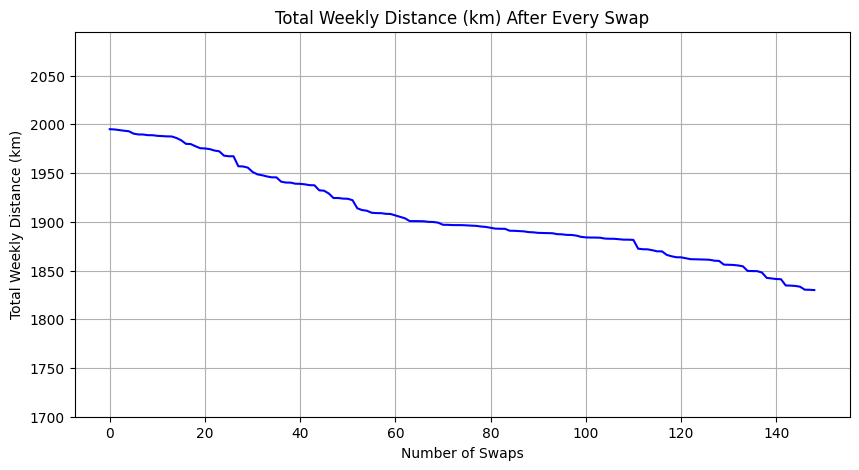

In [30]:
#@title Decrease in Total Distance After Each Swap

x_values = list(range(len(dist_after_swap)))

# Plot the values
plt.figure(figsize=(10, 5))
#plt.plot(x_values, dist_after_swap, marker='o', linestyle='-', color='blue')
plt.plot(x_values, dist_after_swap, linestyle='-', color='blue')
plt.title('Total Weekly Distance (km) After Every Swap')
plt.xlabel('Number of Swaps')
plt.ylabel('Total Weekly Distance (km)')
plt.ylim(1700, max(dist_after_swap) + 100)  # Set the y-axis to start at 0 and end a bit above the max value
plt.grid(True)
plt.show()

<ipython-input-31-ff09a638f17a>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_sched['avg_dist_km'], color='blue', shade=True, label='New Schedule')
<ipython-input-31-ff09a638f17a>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(algo['avg_dist_km'], color='green', shade=True, label='Algorithm')


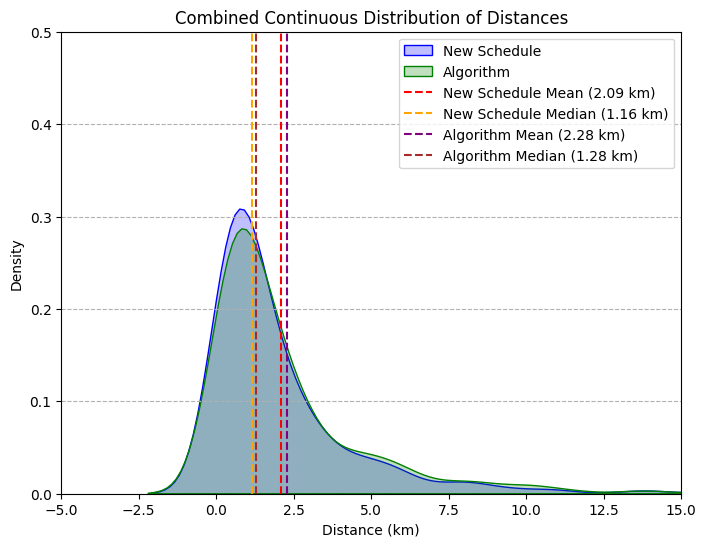

In [31]:
#@title Overlayed KDE Plot

plt.figure(figsize=(8, 6))

# KDE for new_sched
sns.kdeplot(new_sched['avg_dist_km'], color='blue', shade=True, label='New Schedule')

# KDE for algo
sns.kdeplot(algo['avg_dist_km'], color='green', shade=True, label='Algorithm')

# Mean and median lines for new_sched
plt.axvline(new_sched_mean, color='red', linestyle='--', label=f'New Schedule Mean ({new_sched_mean:.2f} km)')
plt.axvline(new_sched_median, color='orange', linestyle='--', label=f'New Schedule Median ({new_sched_median:.2f} km)')

# Mean and median lines for algo
plt.axvline(mean_distance, color='purple', linestyle='--', label=f'Algorithm Mean ({mean_distance:.2f} km)')
plt.axvline(median_distance, color='brown', linestyle='--', label=f'Algorithm Median ({median_distance:.2f} km)')

plt.xlim(-5, 15)
plt.ylim(0, 0.50)


plt.title('Combined Continuous Distribution of Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

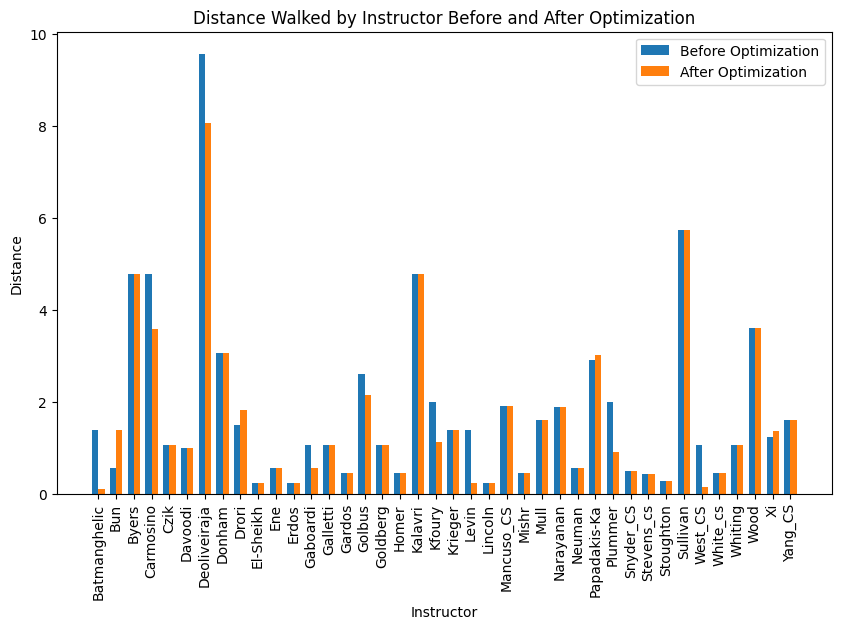

In [32]:
#@title Grouped Bar Chart Of Distances Professors Walk

combine1 = pd.merge(algo, new, on='Instructor', how='left')
before_optimize = combine1[combine1['class_code'] == 'CS'] ### Change the department code to view any department
before_optimize = before_optimize[before_optimize['Instructor'] != 'Staff']
before_optimize = before_optimize.sort_values('Instructor')
before_optimize = before_optimize.drop_duplicates(subset='Instructor', keep='first')

after_optimize = combine[combine['class_code'] == 'CS'] ### Change the department code to view any department
after_optimize = after_optimize[after_optimize['Instructor'] != 'Staff']
after_optimize = after_optimize.sort_values('Instructor')
after_optimize = after_optimize.drop_duplicates(subset='Instructor', keep='first')

n_groups = len(before_optimize['Instructor'])

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Index for the groups
index = np.arange(n_groups)
bar_width = 0.35

# Bar for distances before optimization
ax.bar(index, before_optimize['avg_dist_km'], bar_width, label='Before Optimization')

# Bar for distances after optimization
ax.bar(index + bar_width, after_optimize['avg_dist_km'], bar_width, label='After Optimization')

# Insert details
ax.set_xlabel('Instructor')
ax.set_ylabel('Distance')
ax.set_title('Distance Walked by Instructor Before and After Optimization')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(before_optimize['Instructor'], rotation='vertical')
ax.legend()

# Show the plot
plt.show()


In [33]:
#@title Function to Calculate Distance per Department

def dist_per_dpt(df):
# this function takes a dataframe and returns a dataframe that has department name and the total distance that the profs in that department walk
    department_distances = df.groupby('class_code')['avg_dist_km'].sum().reset_index()
    department_distances.columns = ['Department', 'Total Distance']
    return department_distances

old = combine1
old = old.drop_duplicates(subset='Instructor', keep='first')

new = pd.merge(new_sched, new_schedule, on='Instructor', how='left')
new = new.drop_duplicates(subset='Instructor', keep='first')


before_optimize_dpt = dist_per_dpt(old) # distances for each department before optimization
after_optimize_dpt = dist_per_dpt(new) # distances for each department after optimization



In [34]:
after_optimize_dpt.head()

,Department,Total Distance
0,AA,17.800600
1,AH,16.166415
2,AM,4.095048
3,AN,31.090099
4,AR,9.648185


In [35]:
before_optimize_dpt.head()

,Department,Total Distance
0,AA,23.860844
1,AH,18.626514
2,AM,4.028051
3,AN,33.882678
4,AR,10.282901


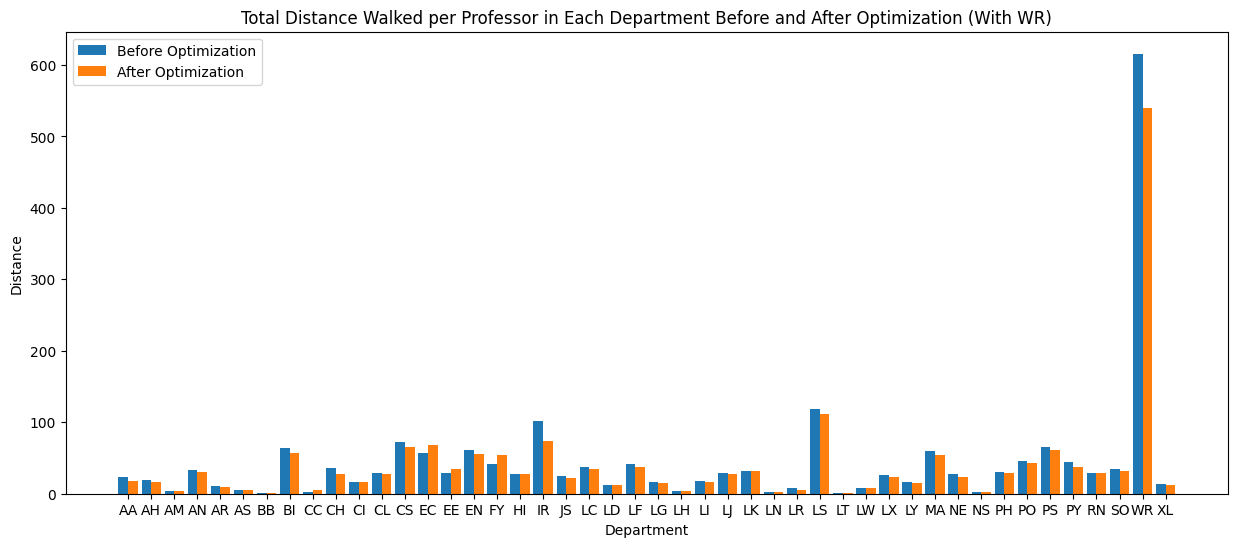

In [40]:
#@title Grouped Bar Chart Of Distances in Each Department (With WR)

n_groups = len(before_optimize_dpt['Department'])

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Index for the groups
index = np.arange(n_groups)
bar_width = 0.42

# Bar for distances before optimization
ax.bar(index, before_optimize_dpt['Total Distance'], bar_width, label='Before Optimization')

# Bar for distances after optimization
ax.bar(index + bar_width, after_optimize_dpt['Total Distance'], bar_width, label='After Optimization')

# Insert details
ax.set_xlabel('Department')
ax.set_ylabel('Distance')
ax.set_title('Total Distance Walked per Professor in Each Department Before and After Optimization (With WR)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(before_optimize_dpt['Department'])
ax.legend()

# Show the plot
plt.show()


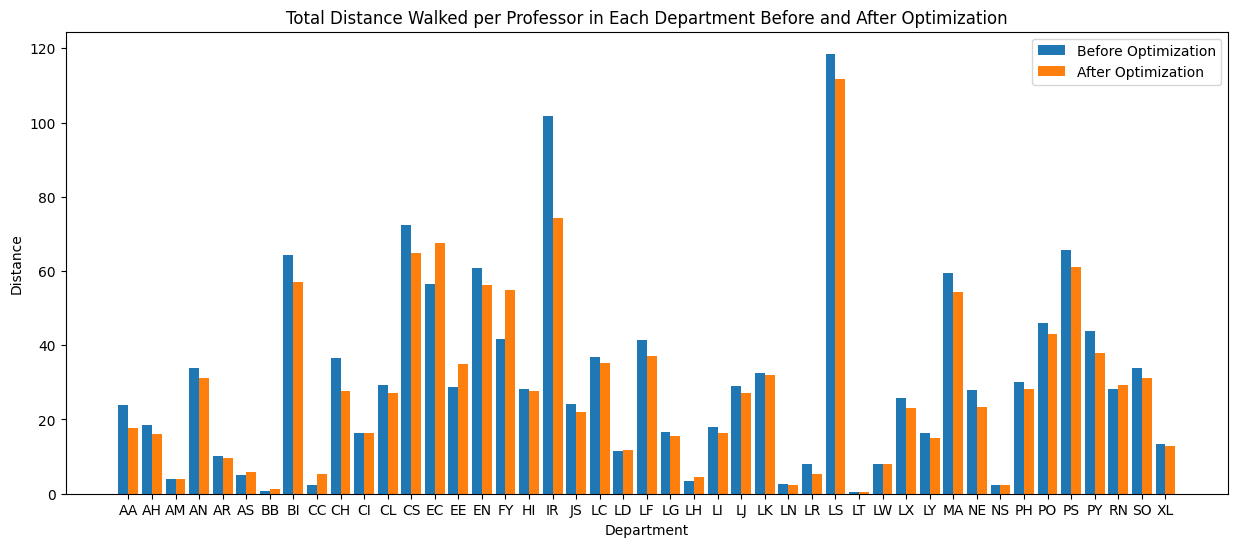

In [41]:
#@title Grouped Bar Chart Of Distances in Each Department

no_wr_before = before_optimize_dpt[before_optimize_dpt['Department']!='WR']
no_wr_after = after_optimize_dpt[after_optimize_dpt['Department']!='WR']

n_groups = len(no_wr_before['Department'])

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Index for the groups
index = np.arange(n_groups)
bar_width = 0.42

# Bar for distances before optimization
ax.bar(index, no_wr_before['Total Distance'], bar_width, label='Before Optimization')

# Bar for distances after optimization
ax.bar(index + bar_width, no_wr_after['Total Distance'], bar_width, label='After Optimization')

# Insert details
ax.set_xlabel('Department')
ax.set_ylabel('Distance')
ax.set_title('Total Distance Walked per Professor in Each Department Before and After Optimization')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(no_wr_before['Department'])
ax.legend()

# Show the plot
plt.show()


In [45]:
#@title Function to Calculate the Percentage Decrease for all Departments

def subtract_distances(df1, df2):
    # Check if the department names are aligned
    if (df1['Department'] == df2['Department']).all():
        # Subtract the 'Total Distance' columns
        df_diff = df1.copy()
        df_diff['Total Distance'] = (1-(df2['Total Distance']/df1['Total Distance']))*-1
        return df_diff
    else:
        # Handle the case where department names are not aligned
        print("Error: Department names do not match.")
        return None

# Example usage:
# Assuming `df1` and `df2` are your DataFrames with 'Department' and 'Total Distance' columns
result_diff_df = subtract_distances(before_optimize_dpt, after_optimize_dpt)



In [46]:
result_diff_df.head(50) # negative means lost distance, positive means gained distance

,Department,Total Distance
0,AA,-0.253983
1,AH,-0.132075
2,AM,0.016633
3,AN,-0.082419
4,AR,-0.061725
5,AS,0.148186
6,BB,1.000000
7,BI,-0.112220
8,CC,1.259829
9,CH,-0.240680
